<a href="https://colab.research.google.com/github/okech-glitch/python/blob/main/Supply_Chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving supply_chain_data.csv to supply_chain_data.csv


**Data Exploration and Cleaning**


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/supply_chain_data.csv')


In [3]:
# Display basic information about the dataset
df.info()

# Display summary statistics for numerical features
df.describe()

# Display summary statistics for categorical features
df.describe(include=['object'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

,Product type,SKU,Customer demographics,Shipping carriers,Supplier name,Location,Inspection results,Transportation modes,Routes
count,100,100,100,100,100,100,100,100,100
unique,3,100,4,3,5,5,3,4,3
top,skincare,SKU0,Unknown,Carrier B,Supplier 1,Kolkata,Pending,Road,Route A
freq,40,1,31,43,27,25,41,29,43


Data Distribution:

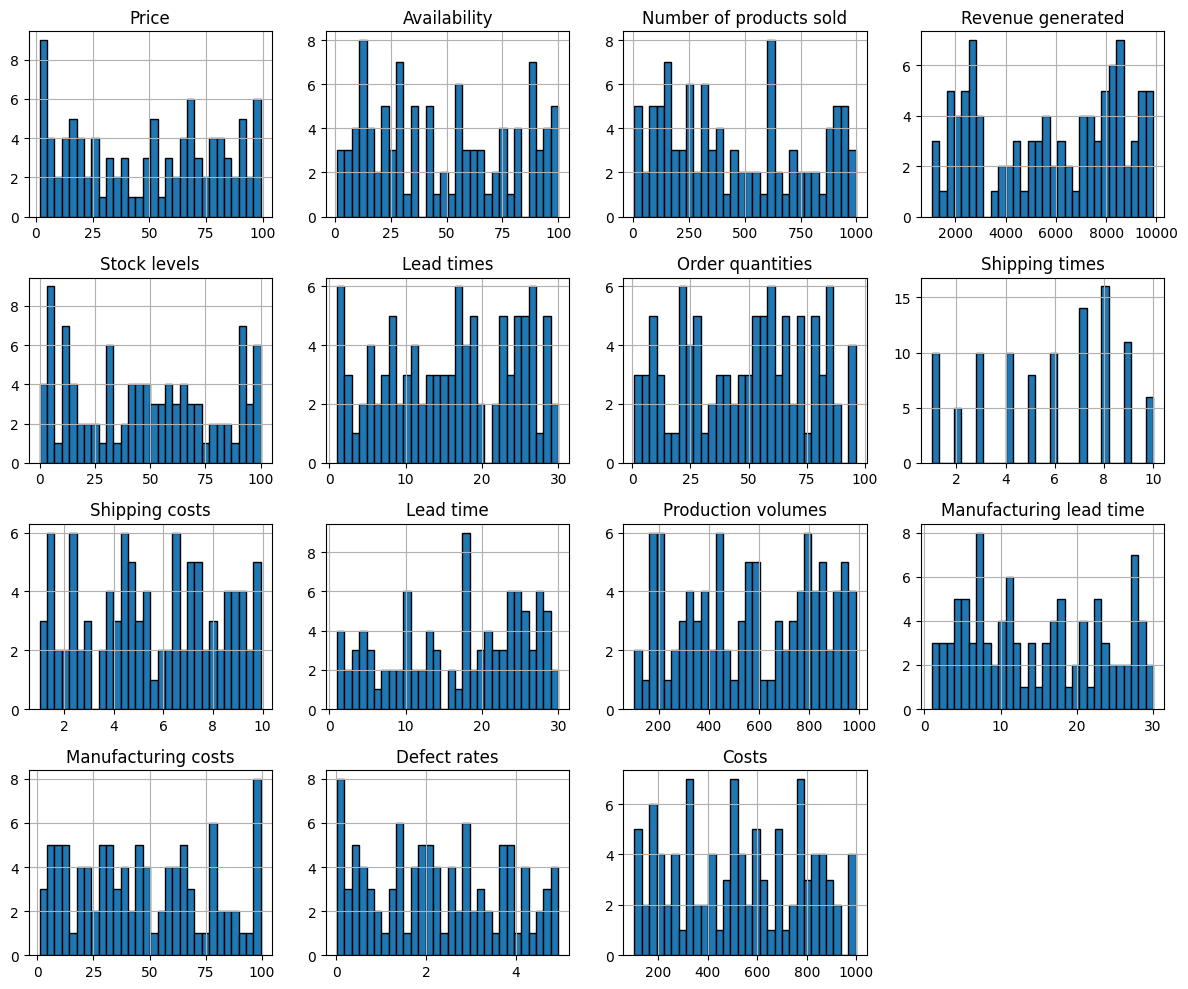

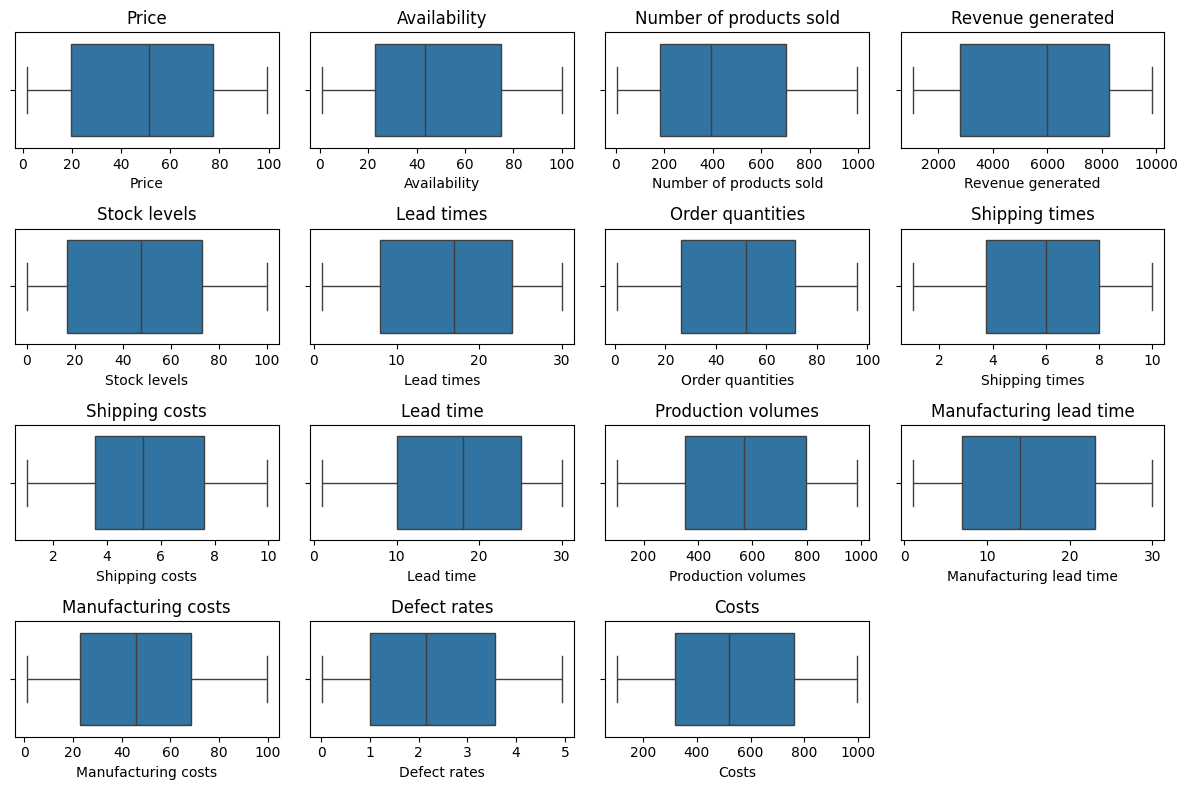

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of numerical columns
num_cols = len(df.select_dtypes(include=[float, int]).columns)

# Calculate the number of rows needed for subplots
num_rows = (num_cols + 3) // 4  # Round up to the nearest integer

# Plot histograms for numerical features
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.select_dtypes(include=[float, int]).columns):
    plt.subplot(num_rows, 4, i+1)  # Adjust the number of rows dynamically
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

Categorical Data Analysis:

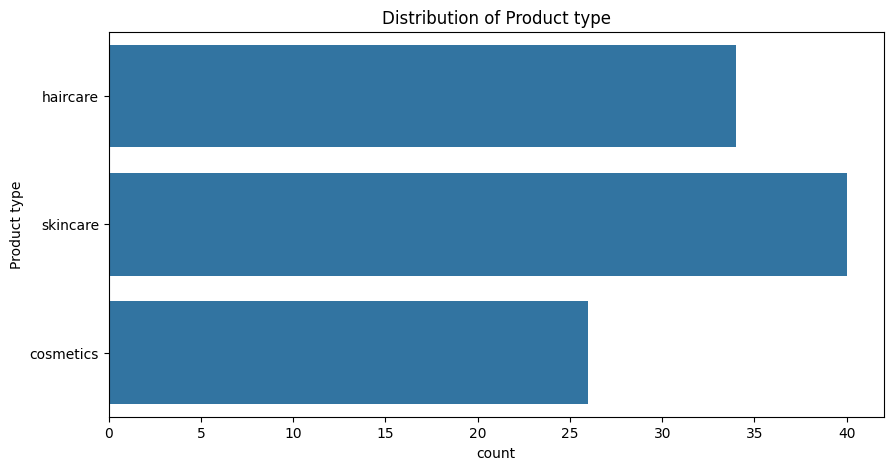

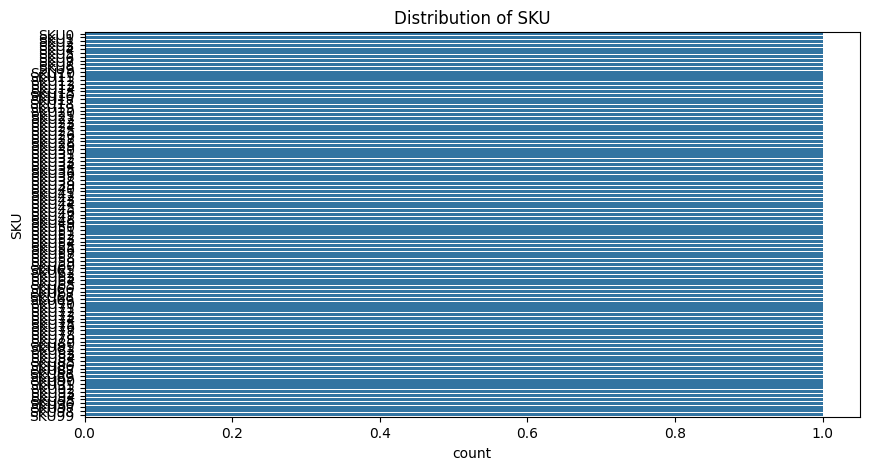

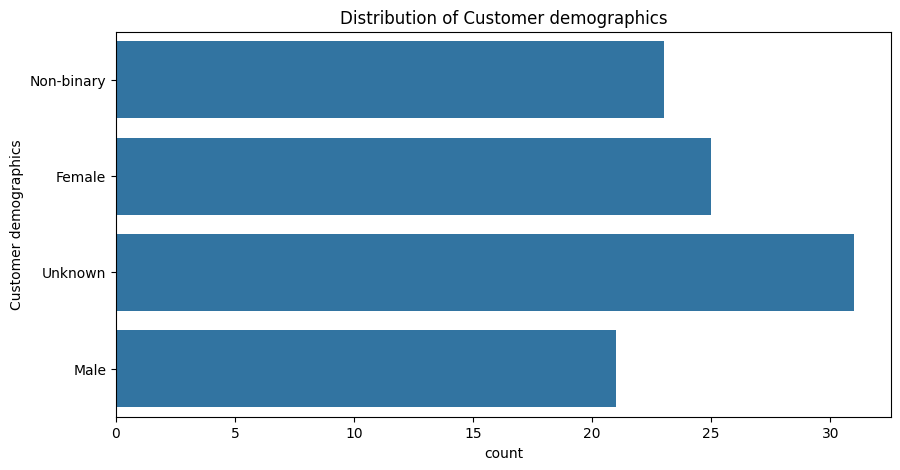

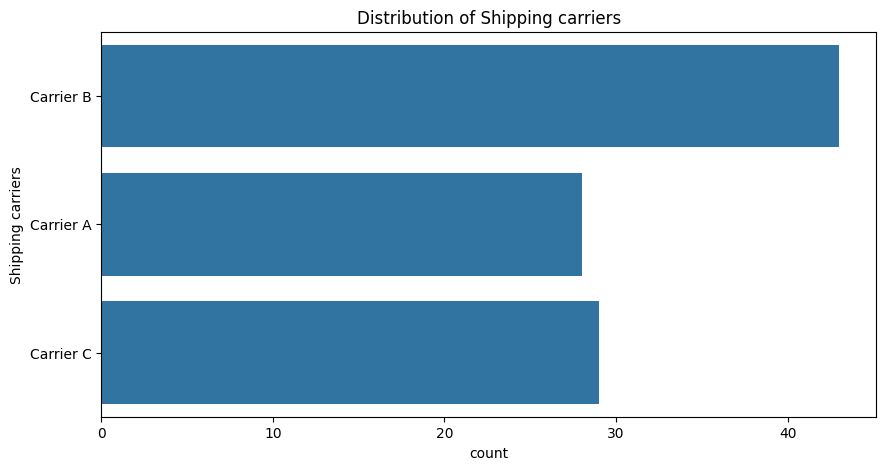

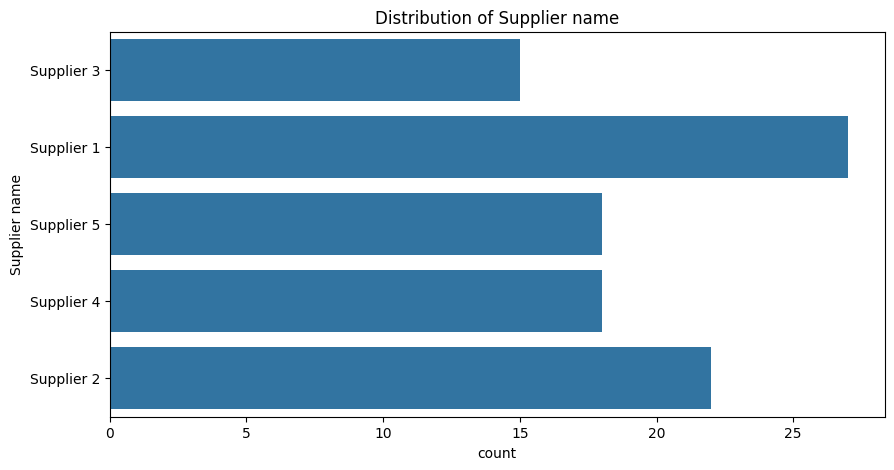

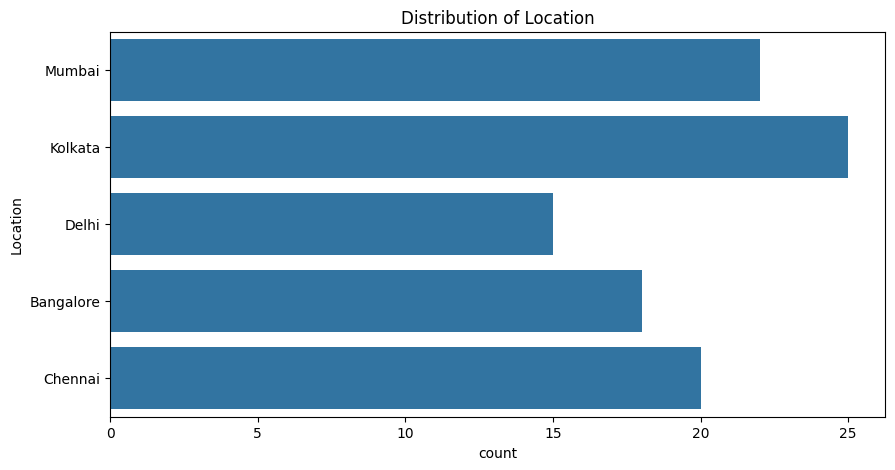

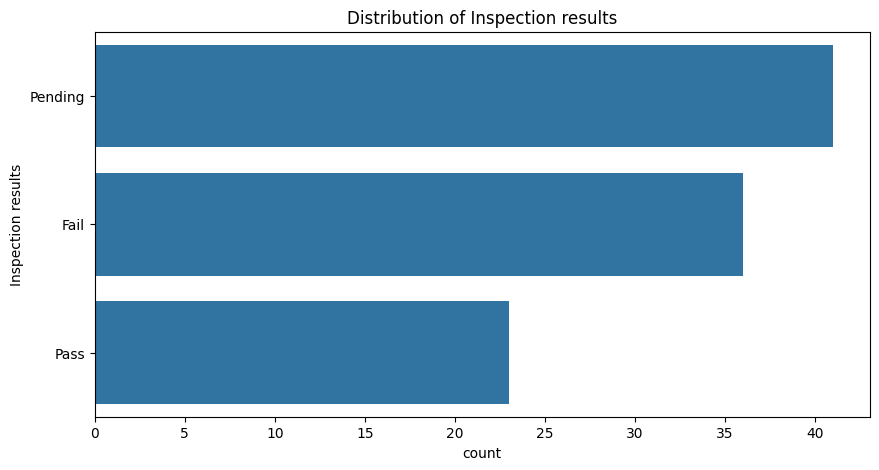

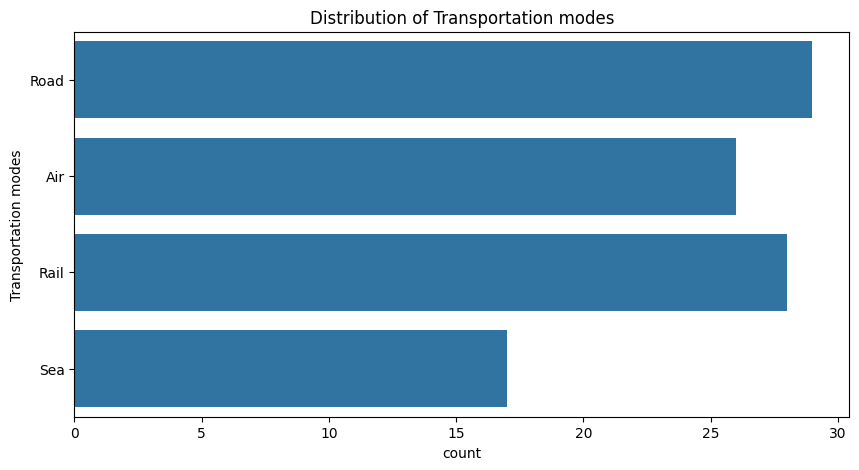

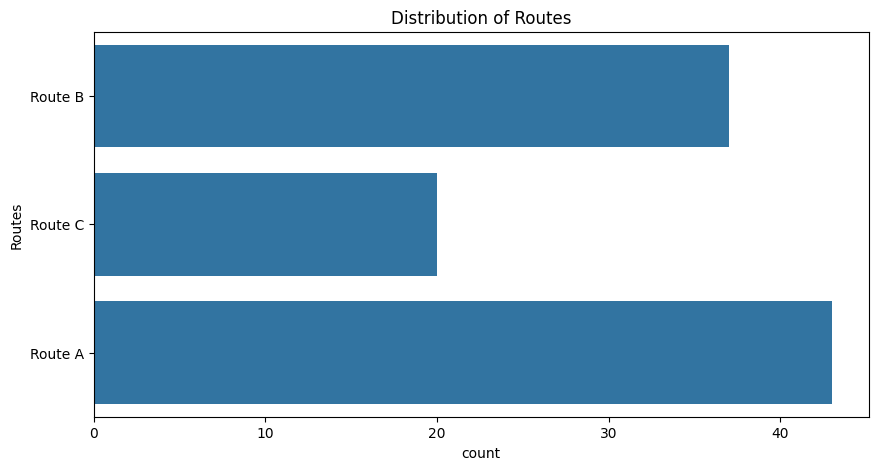

In [6]:
# Plot value counts for categorical features
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[column])
    plt.title(f'Distribution of {column}')
    plt.show()


Check for Correlations:

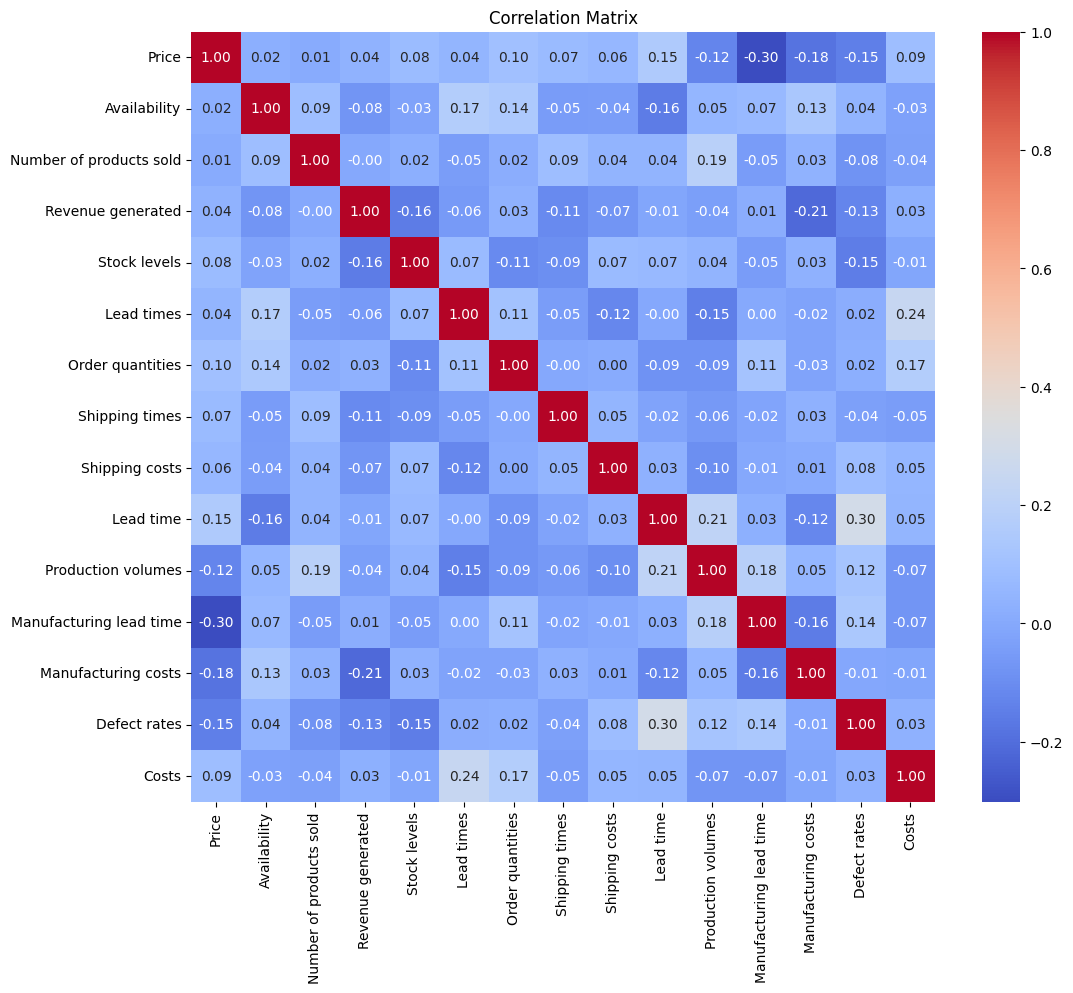

In [8]:
# Compute the correlation matrix for numerical columns only
corr_matrix = df.select_dtypes(include=['float', 'int']).corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Handle Missing Values:



In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Example: Fill missing values (forward fill)
df.fillna(method='ffill', inplace=True)

# Example: Drop rows with missing values
df.dropna(inplace=True)


Series([], dtype: int64)


<ipython-input-9-bc9384ce736f>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Remove Outliers:

In [13]:
from scipy import stats
import numpy as np # Import NumPy

# Remove outliers using z-scores
z_scores = stats.zscore(df.select_dtypes(include=[float, int]))
df_cleaned = df[(np.abs(z_scores) < 3).all(axis=1)]
# Alternatively, use IQR for specific columns
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR)))]


Standardize/Normalize Data

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler



# Alternatively, normalize numerical features
normalizer = MinMaxScaler()
df[numerical_features] = normalizer.fit_transform(df[numerical_features])


Convert Categorical Data:

In [19]:
# Display the columns of the DataFrame
print(df.columns)


Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')


In [20]:
# Convert categorical features to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Product type', 'Shipping carriers', 'Supplier name', 'Location', 'Transportation modes', 'Routes'])


In [21]:
# List of intended categorical columns
intended_categorical_columns = ['Product type', 'Shipping carriers', 'Supplier name', 'Location', 'Transportation modes', 'Routes']

# Filter out columns that are present in the DataFrame
existing_categorical_columns = [col for col in intended_categorical_columns if col in df.columns]

# Apply one-hot encoding to existing columns
df_encoded = pd.get_dummies(df, columns=existing_categorical_columns)


In [22]:
# Display the first few rows of the encoded DataFrame
print(df_encoded.head())


    SKU     Price  Availability  Number of products sold  Revenue generated  \
0  SKU0  0.698749            55                      802        8661.996792   
1  SKU1  0.134845            95                      736        7460.900065   
2  SKU2  0.098693            34                        8        9577.749626   
3  SKU3  0.610060            68                       83        7766.836426   
4  SKU4  0.031861            26                      871        2686.505152   

  Customer demographics  Stock levels  Lead times  Order quantities  \
0            Non-binary          0.58           7          1.000000   
1                Female          0.53          30          0.378947   
2               Unknown          0.01          10          0.915789   
3            Non-binary          0.23          13          0.610526   
4            Non-binary          0.05           3          0.578947   

   Shipping times  ...  Location_Delhi  Location_Kolkata  Location_Mumbai  \
0               4  ..

**Create New Features**


In [24]:
df_encoded['Profit Margin'] = df_encoded['Revenue generated'] / df_encoded['Number of products sold']


In [25]:
df_encoded['Stock Turnover Rate'] = df_encoded['Number of products sold'] / df_encoded['Stock levels']


In [26]:
df_encoded['Lead Time Efficiency'] = df_encoded['Order quantities'] / df_encoded['Lead times']


In [28]:
# Convert the relevant columns to numeric type before performing the addition.
df_encoded['Manufacturing costs'] = pd.to_numeric(df_encoded['Manufacturing costs'], errors='coerce')
df_encoded['Shipping costs'] = pd.to_numeric(df_encoded['Shipping costs'], errors='coerce')
df_encoded['Inspection results'] = pd.to_numeric(df_encoded['Inspection results'], errors='coerce')

# Now calculate the 'Total Costs'
df_encoded['Total Costs'] = df_encoded['Manufacturing costs'] + df_encoded['Shipping costs'] + df_encoded['Inspection results']

**Transform Existing Features**

Log Transformation: Apply to skewed features to normalize the distribution.

In [29]:
import numpy as np

df_encoded['Log Price'] = np.log1p(df_encoded['Price'])
df_encoded['Log Revenue'] = np.log1p(df_encoded['Revenue generated'])


Square Root Transformation: Apply to features with moderate skew.



In [30]:
df_encoded['Sqrt Order Quantities'] = np.sqrt(df_encoded['Order quantities'])


Polynomial Features: Create interaction terms or polynomial featuresin case of non-linear relationships.

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
polynomial_features = poly.fit_transform(df_encoded[['Price', 'Stock levels']])

# Use get_feature_names_out() for newer scikit-learn versions
poly_df = pd.DataFrame(polynomial_features, columns=poly.get_feature_names_out(['Price', 'Stock levels']))
df_encoded = pd.concat([df_encoded, poly_df], axis=1)

**Select Features**

Correlation Analysis: Examine correlations to identify strongly correlated features with the target variable.

In [34]:
# Drop non-numeric columns before calculating correlation
numeric_df = df_encoded.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix['Costs'].sort_values(ascending=False))

Costs                      1.000000
Lead times                 0.243686
Order quantities           0.167306
Sqrt Order Quantities      0.153092
Price                      0.088501
Price                      0.088501
Log Price                  0.079963
Shipping costs             0.051671
Log Revenue                0.050472
Lead time                  0.045219
Defect rates               0.032072
Revenue generated          0.027252
Price Stock levels         0.012201
Stock Turnover Rate        0.011259
Stock levels              -0.012088
Stock levels              -0.012088
Manufacturing costs       -0.013911
Availability              -0.027315
Number of products sold   -0.036951
Shipping times            -0.045541
Manufacturing lead time   -0.074092
Production volumes        -0.074927
Lead Time Efficiency      -0.109739
Profit Margin             -0.116140
Inspection results              NaN
Total Costs                     NaN
Name: Costs, dtype: float64


Feature Importance: Use model-based feature importance techniques.

In [35]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
X = df_encoded.drop(['Costs'], axis=1)  # Drop the target variable
y = df_encoded['Costs']
model.fit(X, y)

importance = model.feature_importances_
feature_importances = pd.Series(importance, index=X.columns)
print(feature_importances.sort_values(ascending=False))


ValueError: could not convert string to float: 'SKU0'